# Assignment 1: Introduction to the Fully Recurrent Network

*Author:* Thomas Adler

*Copyright statement:* This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for  personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.


## Exercise 1: Numerical stability of the binary cross-entropy loss function

We will use the binary cross-entropy loss function to train our RNN, which is defined as 
$$
L_{\text{BCE}}(\hat y, y) = -y \log \hat y - (1-y) \log (1-\hat y),
$$
where $y$ is the label and $\hat y$ is a prediction, which comes from a model (e.g. an RNN) and is usually sigmoid-activated, i.e., we have
$$
\hat y = \sigma(z) = \frac{1}{1+e^{-z}}.
$$
The argument $z$ is called *logit*. For reasons of numerical stability it is better to let the model emit the logit $z$ (instead of the prediction $\hat y$) and incorporate the sigmoid activation into the loss function. Explain why this is the case and how we can gain numerical stability by combining the two functions $L_{\text{BCE}}(\hat y, y)$ and $\sigma(z)$ into one function $L(z, y) = L_{\text{BCE}}(\sigma(z), y)$. 

*Hint: Prove that $\log(1+e^{z}) = \log (1+e^{-|z|}) + \max(0, z)$ and argue why the right-hand side is numerically more stable. Finally, express $L(z,y)$ in terms of that form.*

## My Solution
########## YOUR SOLUTION HERE ##########

Let's prove that $\log(1 + e^z) = \log(1 + e^{-|z|}) + \max(0, z)$. To do that, we have to split the domain. 
For $z>=0$ we have:

$$\log\left ( 1 + e^{z} \right ) =\log\left ( e^{z} \left (1 + e^{-z} \right )\right ) = \log\left ( e^{z} \right ) + \log \left (1 + e^{-z} \right ) = z + \log \left (1 + e^{-z} \right ) = \max\left (0,z \right )+\log \left (1 + e^{-z} \right )$$

For $z<0$:

$$\log\left ( 1+e^{x} \right ) = \log\left ( 1+e^{-\left |x  \right |} \right ) = \max\left ( 0,z \right ) + \log\left ( 1+e^{-\left |x  \right |} \right )$$

Given the binary cross-entropy loss function: 

$$L_{\text{BCE}}(\hat y, y) = -y \log \hat y - (1-y) \log (1-\hat y)$$

and the sigmoid-activation function: 

$$\hat y = \sigma(z) = \frac{1}{1+e^{-z}}$$

it is possible to express $\hat y$ and $1-\hat y$:

$$\hat y = \frac{1}{1+e^{-z}}=\frac{e^{z}}{e^{z}+1}$$

$$1-\hat y = \frac{1}{1+e^{z}}$$

The loss function can be now written as: 

$$L_{BCE}\left ( \hat y, y \right ) = -y \log \left ( \frac{e^{z}}{e^{z}+1} \right ) - \left ( 1-y \right ) \log\left ( \frac{1}{1+e^{z}} \right )$$

which leads to the re-arranged formula: 

$$L\left ( z,y \right ) = -y(z-\log(1+e^{z})) + (1-y)\log(1+e^{z})$$

Using the previous formula: 

$$\log(1+e^{z}) = \log (1+e^{-|z|}) + \max(0, z)$$

it can be written as: 

$$L\left ( z,y \right ) = -y(z- \log (1+e^{-|z|}) + \max(0, z)) + (1-y) \log (1+e^{-|z|}) + \max(0, z))$$





## Exercise 2: Derivative of the loss

Calculate the derivative of the binary cross-entropy loss function $L(z, y)$ with respect to the logit $z$.

########## YOUR SOLUTION HERE ##########

To calculate the derivative of 

$$L(z,y) = -y(z - \log(1+e^{-|z|}) + \max(0, z)) + (1-y)\log(1+e^{-|z|}) + \max(0, z))$$

with respect to the logit $z$, we need to consider the three cases for $z$: $z>0$, $z=0$, and $z<0$. 

1. For $z > 0$, we have $\max(0, z) = z$ and $\max(0, -z) = 0$. The derivative of $L(z,y)$ with respect to $z$ is:

\begin{aligned}
\frac{\partial L}{\partial z} &= -y \left(1 - \frac{e^{-z}}{1 + e^{-z}} + 1\right) + (1 - y) \left(\frac{e^{-z}}{1 + e^{-z}} + 1\right) \\
&= -y \left(2 - \frac{1}{1 + e^{-z}}\right) + (1 - y) \left(\frac{1}{1 + e^{-z}} + 1\right) \\
&= -2y + \frac{y - 1}{1 + e^{-z}} + 1 - y \\
&= \frac{e^{-z}(y - 1)}{1 + e^{-z}} - y + 1.
\end{aligned}

2. For $z = 0$, we have $\max(0, z) = 0$ and $\max(0, -z) = 0$. The derivative of $L(z,y)$ with respect to $z$ is $0$.

3. For $z < 0$, we have $\max(0, z) = 0$ and $\max(0, -z) = -z$. The derivative of $L(z,y)$ with respect to $z$ is:

\begin{aligned}
\frac{\partial L}{\partial z} &= -y \left(- \frac{e^z}{1 + e^z}\right) + (1 - y) \left(\frac{e^z}{1 + e^z} - 1\right) \\
&= \frac{ye^z}{1 + e^z} - \frac{(1 - y)e^z}{1 + e^z} + y - 1 \\
&= \frac{e^z(y - 1)}{1 + e^z} - 1 + y.
\end{aligned}

In summary, the derivative of $L(z,y)$ with respect to $z$ is:

$$
\frac{\partial L}{\partial z} = 
\begin{cases} 
\frac{e^{-z}(y - 1)}{1 + e^{-z}} - y + 1 & \text{if } z > 0 \\
\text{0} & \text{if } z = 0 \\
\frac{e^z(y - 1)}{1 + e^z} - 1 + y & \text{if } z < 0.
\end{cases}
$$

## Exercise 3: Initializing the network
Consider the fully recurrent network
$$
s(t) = W x(t) + R a(t-1) \\
a(t) = \tanh(s(t)) \\
z(t) = V a(t) \\
\hat y(t) = \sigma(z(t))
$$
for $t \in \mathbb{N}, x(t) \in \mathbb{R}^{D}, s(t) \in \mathbb{R}^{I}, a(t) \in \mathbb{R}^{I}, z(t) \in \mathbb{R}^K, \hat y(t) \in \mathbb{R}^K$ and $W, R, V$ are real matrices of appropriate sizes and $\hat a(0) = 0$. 

*Compared to the lecture notes we choose $f(x) = \tanh(x) = (e^x - e^{-x})(e^x + e^{-x})^{-1}$ and $\varphi(x) = \sigma(x) = (1+e^{-x})^{-1}$. Further, we introduced an auxiliary variable $z(t)$ and transposed the weight matrices.*

Write a function `init` that takes a `model` and integers $D, I, K$ as arguments and stores the matrices $W, R, V$ as members `model.W`, `model.R`, `model.V`, respectively. The matrices should be `numpy` arrays of appropriate sizes and filled with random values that are uniformly distributed between -0.01 and 0.01. 

In [1]:
%matplotlib inline
import numpy as np
from scipy.special import expit as sigmoid

class Obj(object):
    pass

model = Obj()
T, D, I, K = 10, 3, 5, 1

def init(model, D, I, K):
    ########## YOUR SOLUTION HERE ##########
    model.V = np.random.uniform(-0.01, 0.01, (K, I))
    
    model.W = np.random.uniform(-0.01, 0.01, (I, D))
    model.R = np.random.uniform(-0.01, 0.01, (I, I))
    

Obj.init = init
model.init(D, I, K)

## Exercise 4: The forward pass
Implement the forward pass for the fully recurrent network for sequence classification (many-to-one mapping). To this end, write a function `forward` that takes a `model`, a sequence of input vectors `x`, and a label `y` as arguments. The inputs will be represented as a `numpy` array of shape `(T, D)`. It should execute the behavior of the fully recurrent network and evaluate the (numerically stabilized) binary cross-entropy loss at the end of the sequence and return the resulting loss value. Store the sequence of hidden activations $(a(t))_{t=1}^T$ and the logit $z(T)$ into `model.a` and `model.z`, respectively. 

In [2]:
def forward(model, x, y):
    ########## YOUR SOLUTION HERE ##########
    T, D = x.shape
    a = np.zeros((T, model.R.shape[0]))
    s = np.zeros_like(a)

    # Recurrent computation of hidden activations a(t)
    for t in range(T):
        s[t] = np.dot(model.W, x[t]) + np.dot(model.R, a[t-1] if t > 0 else np.zeros(model.R.shape[1]))
        a[t] = np.tanh(s[t])

    # Store the sequence of hidden activations
    model.a = a

    # Compute the logit z(T)
    z_T = np.dot(model.V, a[-1])
    model.z = z_T

    # Compute the binary cross-entropy loss
    loss = -y * (z_T - np.log(1 + np.exp(-np.abs(z_T))) + np.maximum(0, z_T)) + (1 - y) * (np.log(1 + np.exp(-np.abs(z_T))) + np.maximum(0, z_T))
    
    return loss


Obj.forward = forward
model.forward(np.random.uniform(-1, 1, (T, D)), 1)

array([0.69317026])

## Exercise 5: The computational graph

Visualize the computational graph of the fully recurrent network unfolded in time. The graph should show the functional dependencies of the nodes $x(t), a(t), z(t), L(z(t), y(t))$ for $t \in \{1, 2, 3\}$. Use the package `networkx` in combination with `matplotlib` to draw a directed graph with labelled nodes and edges. If you need help take a look at [this guide](https://networkx.guide/visualization/basics/). Make sure to arrange the nodes in a meaningful way. 

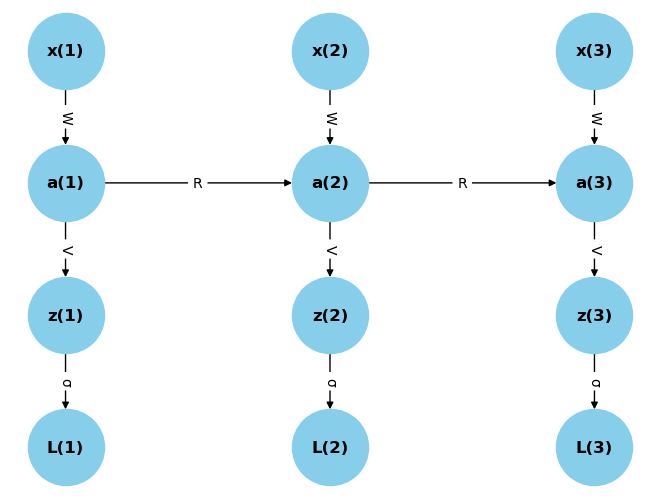

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

########## YOUR SOLUTION HERE ##########

# Create directed graph
G = nx.DiGraph()

# Add nodes
for t in range(1, 4):
    G.add_node(f"x({t})")
    G.add_node(f"a({t})")
    G.add_node(f"z({t})")
    G.add_node(f"L({t})")

# Add edges
for t in range(1, 4):
    G.add_edge(f"x({t})", f"a({t})", label="W")
    if t > 1:
        G.add_edge(f"a({t-1})", f"a({t})", label="R")  # Avoid connecting a(0) to a(1)
    G.add_edge(f"a({t})", f"z({t})", label="V")
    G.add_edge(f"z({t})", f"L({t})", label="σ")

# Define positions for the nodes
pos = {}
for t in range(1, 4):
    pos[f"x({t})"] = (t, 3)
    pos[f"a({t})"] = (t, 2)
    pos[f"z({t})"] = (t, 1)
    pos[f"L({t})"] = (t, 0)

# Draw graph
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=3000, node_color='skyblue')
labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()
